In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/Users/kirtan/Downloads/Train-2.csv')

In [3]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [4]:
df = df.drop(columns='ID',axis=1)

In [5]:
df.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1


In [6]:
df.shape

(10999, 11)

In [7]:
df.isnull().sum()

Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [8]:
Categorical_Col = []
Numerical_Col = []

In [9]:
for col in df.columns:
    if df[col].dtype == 'object':
        Categorical_Col.append(col)
        
    else:
        Numerical_Col.append(col)

In [10]:
Categorical_Col

['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']

In [11]:
Numerical_Col

['Customer_care_calls',
 'Customer_rating',
 'Cost_of_the_Product',
 'Prior_purchases',
 'Discount_offered',
 'Weight_in_gms',
 'Reached.on.Time_Y.N']

In [12]:
for col in Categorical_Col:
    print(df[col].unique())

['D' 'F' 'A' 'B' 'C']
['Flight' 'Ship' 'Road']
['low' 'medium' 'high']
['F' 'M']


# Encoding

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
LE = LabelEncoder()

In [16]:
for col in Categorical_Col:
    df[col] = LE.fit_transform(df[col])

In [17]:
df.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,3,0,4,2,177,3,1,0,44,1233,1
1,4,0,4,5,216,2,1,1,59,3088,1
2,0,0,2,2,183,4,1,1,48,3374,1
3,1,0,3,3,176,4,2,1,10,1177,1
4,2,0,2,2,184,3,2,0,46,2484,1


# Data Visualization

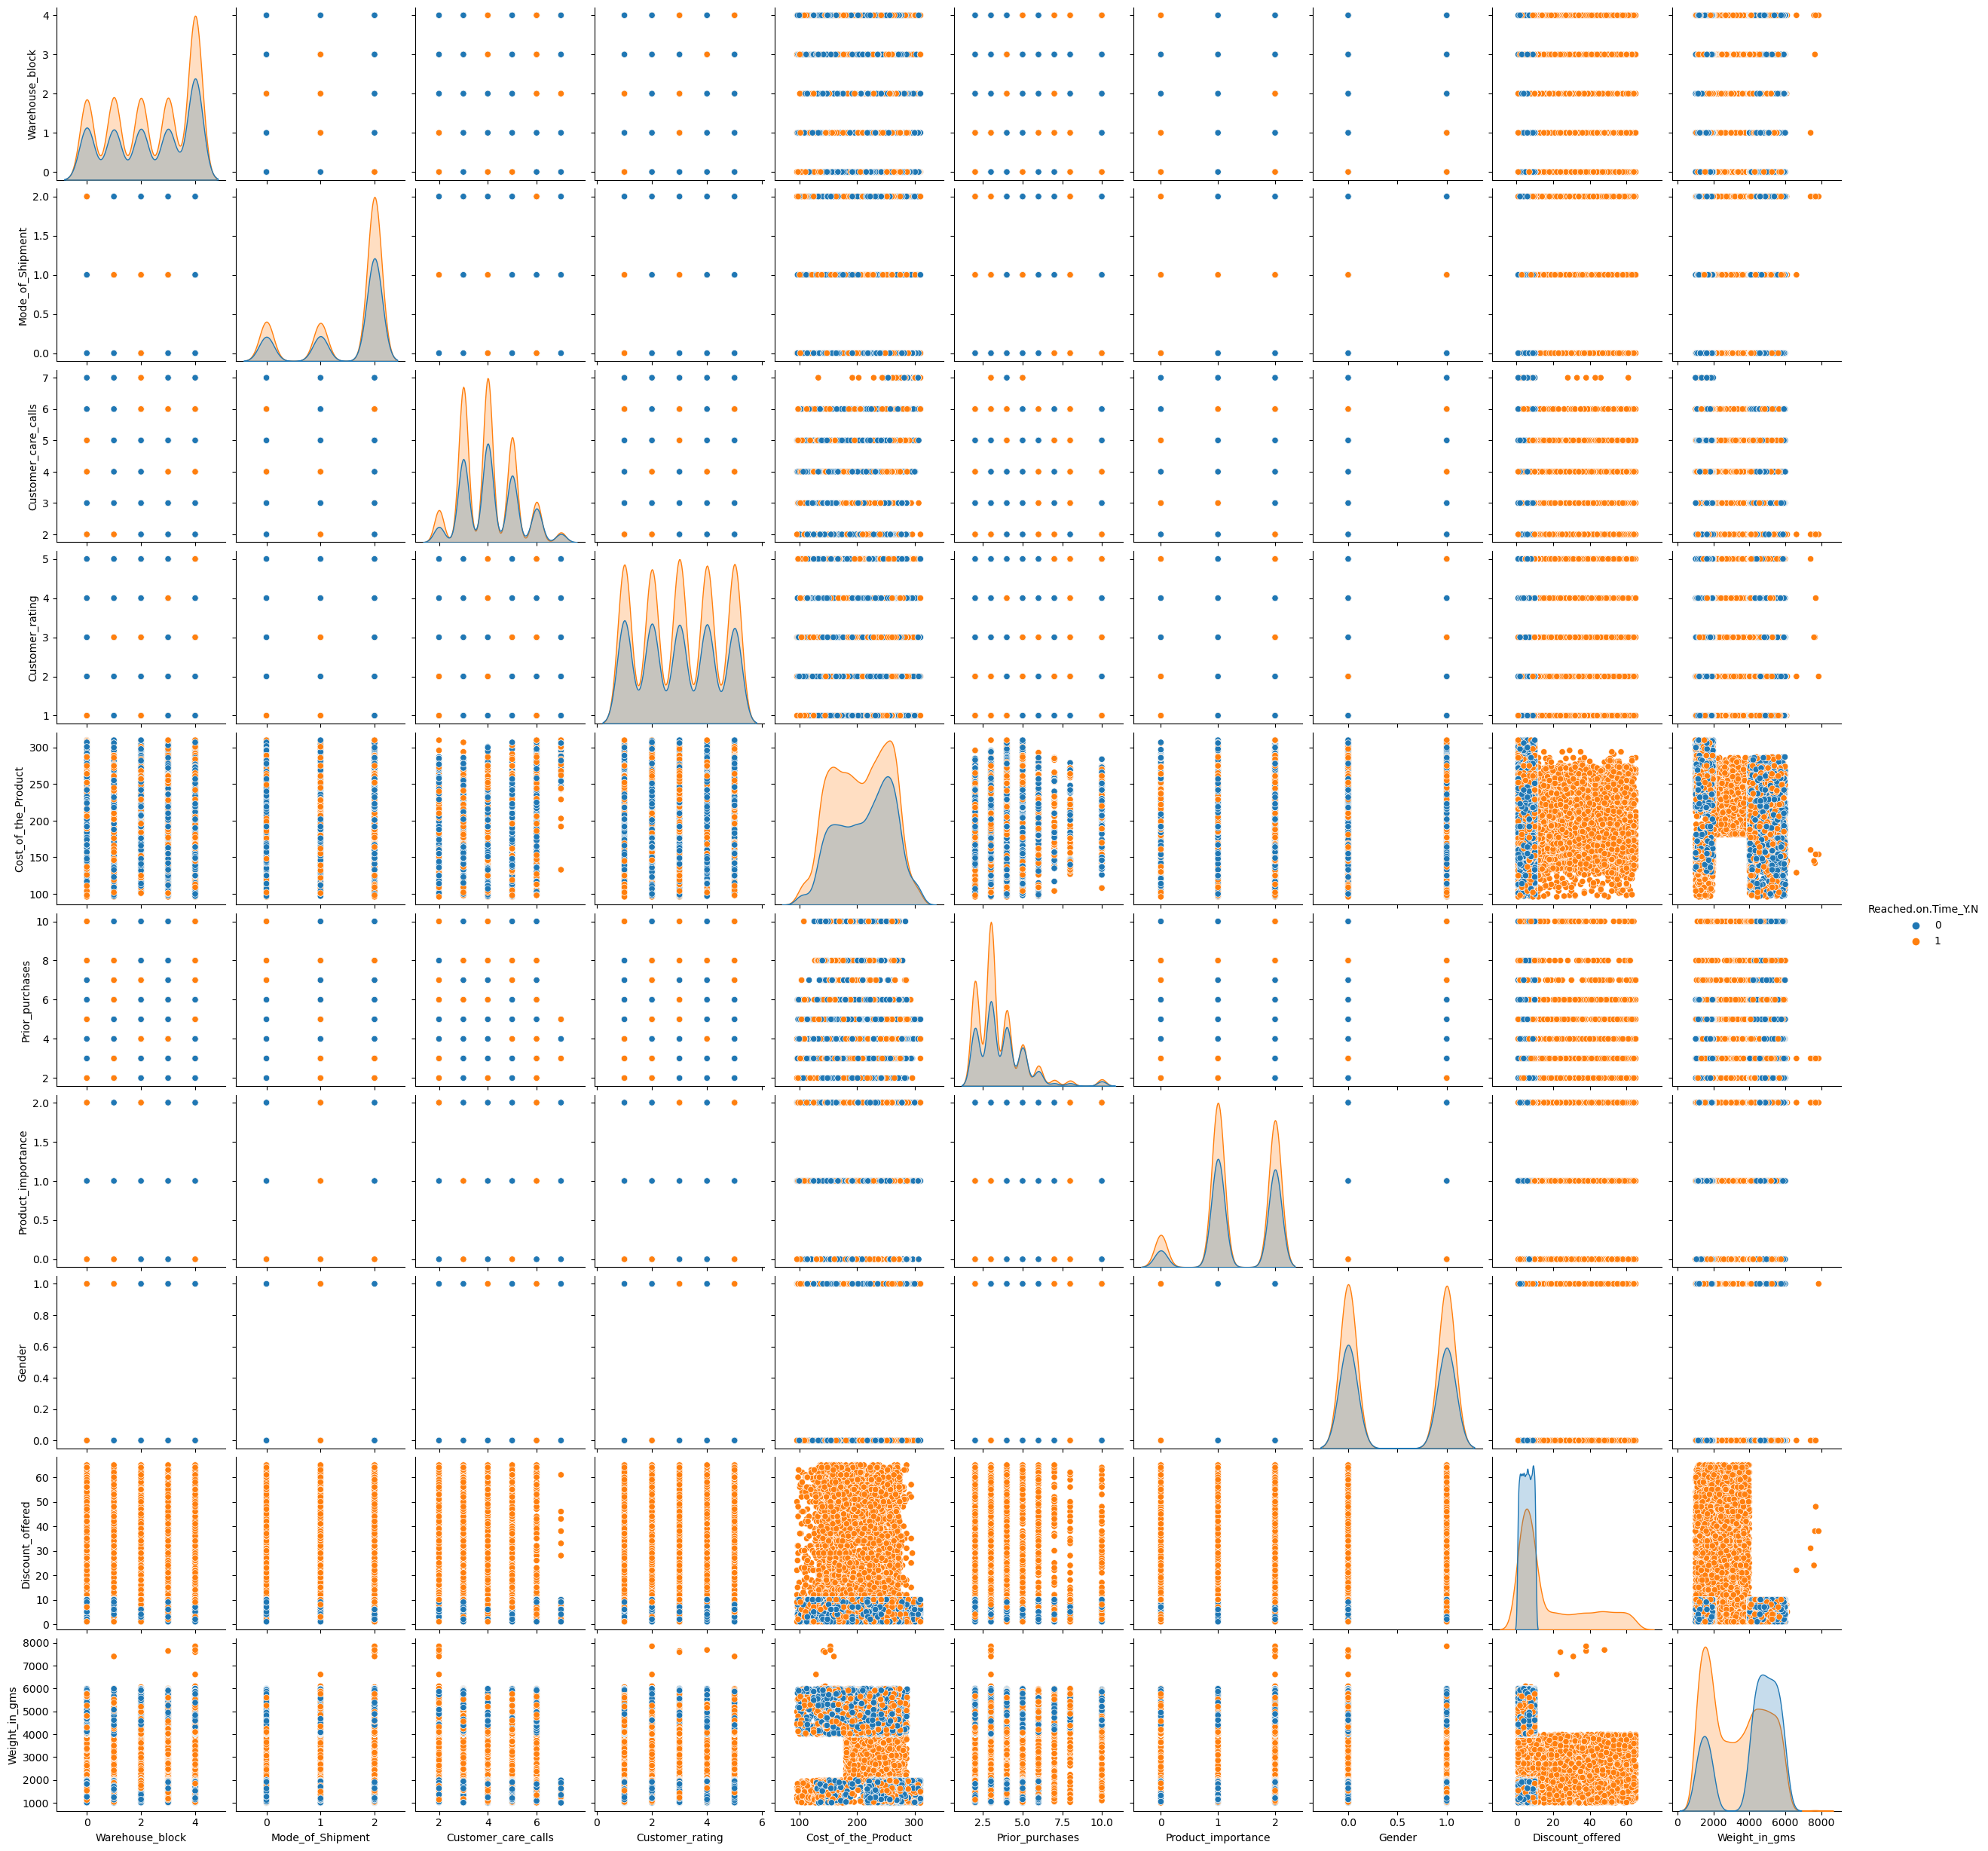

In [18]:
sns.pairplot(df,hue='Reached.on.Time_Y.N')
plt.show()

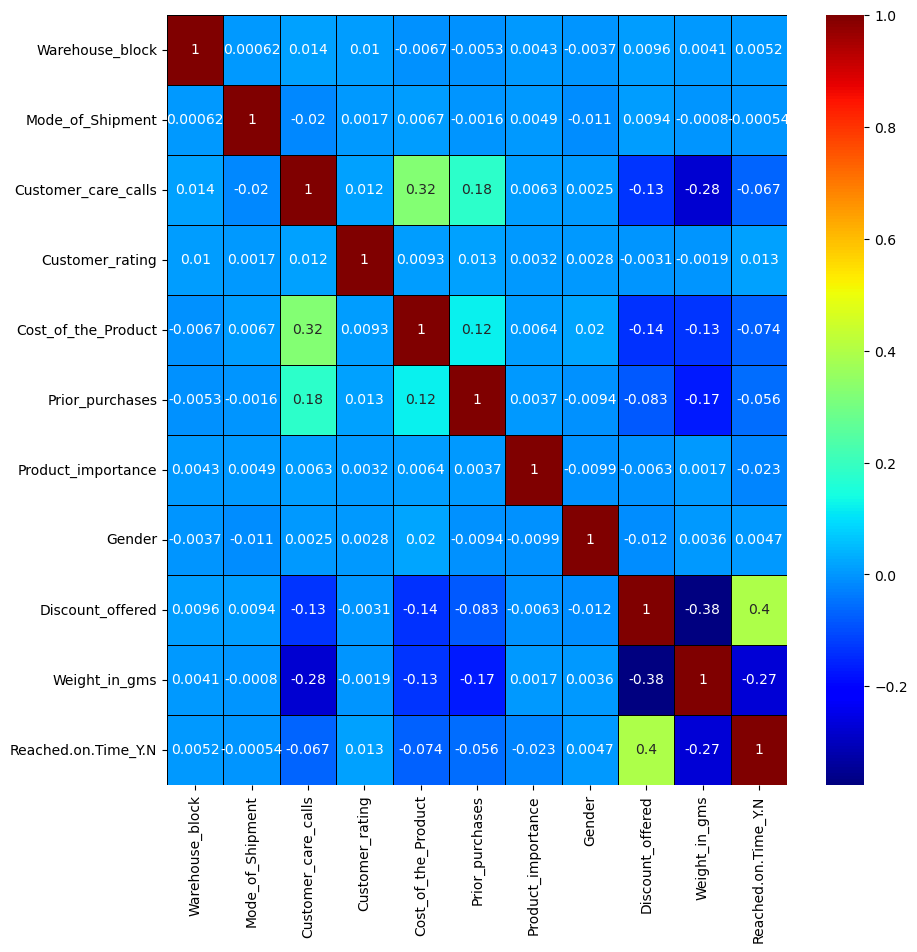

In [20]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap='jet',linewidths=0.5,linecolor='black')
plt.show()

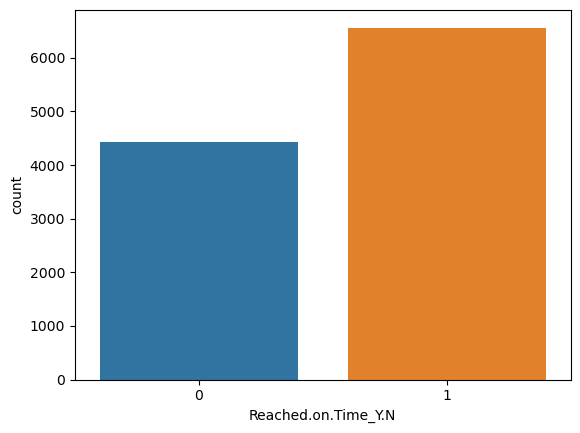

In [91]:
sns.countplot(data=df, x='Reached.on.Time_Y.N')
plt.show()

# Train & Test Split

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X = df.iloc[:,:-1]
X

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
0,3,0,4,2,177,3,1,0,44,1233
1,4,0,4,5,216,2,1,1,59,3088
2,0,0,2,2,183,4,1,1,48,3374
3,1,0,3,3,176,4,2,1,10,1177
4,2,0,2,2,184,3,2,0,46,2484
...,...,...,...,...,...,...,...,...,...,...
10994,0,2,4,1,252,5,2,0,1,1538
10995,1,2,4,1,232,5,2,0,6,1247
10996,2,2,5,4,242,5,1,0,4,1155
10997,4,2,5,2,223,6,2,1,2,1210


In [23]:
y = df.iloc[:,-1:]
y

,Reached.on.Time_Y.N
0,1
1,1
2,1
3,1
4,1
...,...
10994,1
10995,0
10996,0
10997,0


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:
from xgboost import XGBClassifier

In [71]:
XGB = XGBClassifier()

In [77]:
XGB.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': None,
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [75]:
from skopt import BayesSearchCV
from skopt.space import Categorical

In [78]:
Space = {
    'n_estimators' : Categorical([100,200,500,1000,5000]),
    'max_depth' : Categorical([1,2,5,7,10]),
    'learning_rate' : Categorical([0.01,0.001])
}

In [79]:
Opt = BayesSearchCV(XGB, search_spaces=Space, n_iter=100, scoring='accuracy', cv=10, random_state=42)

In [80]:
Opt.fit(X_train, y_train)

/Users/kirtan/opt/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/Users/kirtan/opt/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/Users/kirtan/opt/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/Users/kirtan/opt/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/Users/kirtan/opt/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  

BayesSearchCV(cv=10,
              estimator=XGBClassifier(base_score=None, booster=None,
                                      callbacks=None, colsample_bylevel=None,
                                      colsample_bynode=None,
                                      colsample_bytree=None,
                                      early_stopping_rounds=None,
                                      enable_categorical=False,
                                      eval_metric=None, feature_types=None,
                                      gamma=None, gpu_id=None, grow_policy=None,
                                      importance_type=None,
                                      interaction_constraints=None,
                                      learning_rate=Non...
                                      n_estimators=100, n_jobs=None,
                                      num_parallel_tree=None, predictor=None,
                                      random_state=None, ...),
              n_iter=100, 

In [81]:
Opt.best_params_

OrderedDict([('learning_rate', 0.01), ('max_depth', 5), ('n_estimators', 100)])

In [82]:
Opt.best_score_

0.6834858827179646

In [83]:
y_hat = Opt.predict(X_test)

# Model Evaluation

In [84]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [85]:
print(accuracy_score(y_test,y_hat))

0.6859090909090909


In [86]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.57      0.92      0.70       895
           1       0.90      0.53      0.67      1305

    accuracy                           0.69      2200
   macro avg       0.74      0.72      0.68      2200
weighted avg       0.77      0.69      0.68      2200



In [87]:
print(confusion_matrix(y_test,y_hat))

[[822  73]
 [618 687]]
